### LAB 7-5 : XOR 연산이 가능한 다층 퍼셉트론 만들기

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# np.random.randn() : 평균0, 표준편차의 가우시안 표준정규분포 난수를 matrix array를 생성
U = np.random.rand(2,3)   # 연결강도 
W = np.random.rand(3,2)   # 연결강도 
learning_rate = 1.0       # 학습률 

In [ ]:
# 0에서 1 사이의 함수이며, 값이 들어왔을 때, 0~1 사이의 값을 반환한다.
def sigmoid(v):
    return 1 / (1+np.exp(-v))

def derivative_sigmoid(v):
    s = sigmoid(v)
    return s*(1-s)

In [ ]:
# np.zeros() : 0으로 초기화된 shqpe 차원의 ndarray 배열 객체를 반환
input = np.zeros(2)

# 순전파시 계산될 값들
h_sum, h_out, h_deriv = np.zeros(3), np.zeros(3), np.zeros(3)
# 역전파시 계산될 값들 
h_error, h_delta = np.zeros(3), np.zeros(3)                  

# 순전파시 계산될 값들 
y_sum, y_out, y_deriv = np.zeros(2), np.zeros(2), np.zeros(2)
# 역전파시 계산될 값들 
y_error, y_delta = np.zeros(2), np.zeros(2)

In [ ]:
# forward_xh() : 은닉층
def forward_xh(x):
    global input, h_sum, h_out, h_deriv
    input = x
    h_sum = U.T.dot(input)                 # 은닉층에서 합산된 값
    h_out = sigmoid(h_sum)                 # 은닉층의 활성화 값
    h_deriv = derivative_sigmoid(h_sum)    # 은닉층 활성화 미분치

In [ ]:
# forward_hy() : 출력층
def forward_hy():
    global y_sum, y_out, y_deriv
    y_sum = W.T.dot(h_out)                  # 출력층에서 합산된 값
    y_out = sigmoid(y_sum)                  # 출력층의 활성화 값
    y_deriv = derivative_sigmoid(y_sum)     # 출력층의 활성화 미분치

In [ ]:
def compute_error(target):
    return y_out - target                   # 오차의 계산

In [ ]:
# backward_y() : 출력층 오차
def backward_y(error):
    global y_error, y_delta, W
    y_error = error                                    # 출력층 오차
    y_delta = y_deriv * y_error                        # 출력층에서 보내는 델타
    ## 연결강도 W 수정
    dW = - learning_rate * np.outer(h_out, y_delta)    # 연결강도 갱신: 은닉층 출력과 출력층 델타의 외적
    W = W + dW   

In [ ]:
def backward_h():
   global h_error, h_delta, U
   h_error = W.dot(y_delta)                             # 은닉층 오차
   h_delta = h_deriv * h_error                          # 은닉층에서 보내는 델타
   ## 연결강도 U 수정
   dU = - learning_rate * np.outer(input, h_delta)      # 연결강도 갱신
   U = U + dU  

In [ ]:
def train(x, target):
    forward_xh(x)
    forward_hy()
    e = compute_error(target)
    backward_y(e)
    backward_h()
    return e**2

In [ ]:
loss = []

for i in range(1000):
    e_accum=0
    true = np.array([1,0])
    false = np.array([0,1])
    e_accum += train(np.array([0,0]), false)    # 훈련 데이터 1 
    e_accum += train(np.array([0,1]), true)     # 훈련 데이터 2
    e_accum += train(np.array([1,0]), true)     # 훈련 데이터 3
    e_accum += train(np.array([1,1]), false)    # 훈련 데이터 4
    loss.append(e_accum)

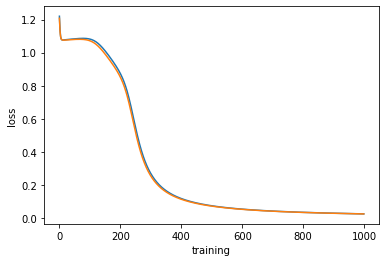

In [ ]:
plt.plot(loss)
plt.ylabel('loss')
plt.xlabel('training')
plt.show()

In [ ]:
def test(X):
    y_hat = []
    for x in X:
        forward_xh(x)
        forward_hy()
        y_hat.append(y_out)
    return y_hat

In [ ]:
test(np.array([[0, 0], [0, 1], [1, 0], [1, 1]]))

[array([0.11705313, 0.88354347]),
 array([0.92765287, 0.0719434 ]),
 array([0.92715233, 0.072433  ]),
 array([0.03426373, 0.96605536])]